In [1]:
import numpy as np
import numpy
from numpy.linalg import inv

In [2]:
#create MDP environment
class Environment():
    """
    members: - state set S, 
             - action set A, 
             - w, discount factor, 
              - reward function
             - transition probability matrix PU(100*100), PD(100*100), PL(100*100), PR(100*100).
    """    
    def __init__(self, w, disc):
        self.w = w
        self.disc = disc
        #state set
        self.S = numpy.zeros(shape=(10,10))
        self.S = [[(0.0 + 10.0 * i) for i in range(10)],
                  [(1.0 + 10.0 * i) for i in range(10)],
                  [(2.0 + 10.0 * i) for i in range(10)],
                  [(3.0 + 10.0 * i) for i in range(10)],
                  [(4.0 + 10.0 * i) for i in range(10)],
                  [(5.0 + 10.0 * i) for i in range(10)],
                  [(6.0 + 10.0 * i) for i in range(10)],
                  [(7.0 + 10.0 * i) for i in range(10)],
                  [(8.0 + 10.0 * i) for i in range(10)],
                  [(9.0 + 10.0 * i) for i in range(10)]]

        #action set
        self.A = ['up', 'down', 'left', 'right']
        
        #Transition probability
        PU = numpy.zeros(shape=(100,100))#up transition probability
        PD = numpy.zeros(shape=(100,100))#down transition probability
        PL = numpy.zeros(shape=(100,100))#left transition probability
        PR = numpy.zeros(shape=(100,100))#right transition probability
        
        #row is state at time step t, column is state at time step t+1
        # for agent at edge states
        for i in range(1,9):
            PU[i][i] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for j in range(1,9):
            i = 10*j
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for k in range(1,9):
            i = 9 + k*10
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i] = self.w/4.0 #>
            PU[i][i+10] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i] = self.w/4.0
            PD[i][i+10] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i] = self.w/4.0
            PL[i][i+10] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i] = 1 - self.w + self.w/4.0
            PR[i][i+10] = self.w/4.0
        for n in range(1,9):
            i = 90 + n
            PU[i][i-10] = 1 - self.w + self.w/4.0 #^
            PU[i][i-1] = self.w/4.0 #<
            PU[i][i+1] = self.w/4.0 #>
            PU[i][i] = self.w/4.0 #!
            PD[i][i-10] = self.w/4.0
            PD[i][i-1] = self.w/4.0
            PD[i][i+1] = self.w/4.0
            PD[i][i] = 1 - self.w + self.w/4.0
            PL[i][i-10] = self.w/4.0
            PL[i][i-1] = 1 - self.w + self.w/4.0
            PL[i][i+1] = self.w/4.0
            PL[i][i] = self.w/4.0
            PR[i][i-10] = self.w/4.0
            PR[i][i-1] = self.w/4.0
            PR[i][i+1] = 1 - self.w + self.w/4.0
            PR[i][i] = self.w/4.0
        
            
        # for agent at corner states
        PU[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[0][1] = self.w/4.0
        PU[0][10] = self.w/4.0
        PD[0][0] = self.w/4.0+ self.w/4.0
        PD[0][1] = self.w/4.0
        PD[0][10] = 1 - self.w + self.w/4.0 
        PL[0][0] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[0][1] = self.w/4.0
        PL[0][10] = self.w/4.0
        PR[0][0] = self.w/4.0+ self.w/4.0
        PR[0][1] = 1 - self.w + self.w/4.0
        PR[0][10] = self.w/4.0
                
        PU[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PU[9][8] = self.w/4.0
        PU[9][19] = self.w/4.0        
        PD[9][9] = self.w/4.0 + self.w/4.0
        PD[9][8] = self.w/4.0
        PD[9][19] = 1 - self.w + self.w/4.0 
        PL[9][9] = self.w/4.0 + self.w/4.0
        PL[9][8] = 1 - self.w + self.w/4.0 
        PL[9][19] = self.w/4.0
        PR[9][9] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[9][8]= self.w/4.0
        PR[9][19] = self.w/4.0
           
        PU[90][90] = self.w/4.0 + self.w/4.0
        PU[90][80] = 1 - self.w + self.w/4.0 
        PU[90][91] = self.w/4.0            
        PD[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[90][80] = self.w/4.0
        PD[90][91] = self.w/4.0           
        PL[90][90] = 1 - self.w + self.w/4.0 + self.w/4.0
        PL[90][80] = self.w/4.0
        PL[90][91] = self.w/4.0           
        PR[90][90] = self.w/4.0 + self.w/4.0
        PR[90][80]= self.w/4.0
        PR[90][91] = 1 - self.w + self.w/4.0 
        
        PU[99][99] = self.w/4.0 + self.w/4.0
        PU[99][89] = 1 - self.w + self.w/4.0 
        PU[99][98] = self.w/4.0         
        PD[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PD[99][89] = self.w/4.0
        PD[99][98] = self.w/4.0           
        PL[99][99] = self.w/4.0 + self.w/4.0 
        PL[99][89] = self.w/4.0
        PL[99][98] = 1 - self.w + self.w/4.0           
        PR[99][99] = 1 - self.w + self.w/4.0 + self.w/4.0
        PR[99][89]= self.w/4.0
        PR[99][98] = self.w/4.0
        
        # for other states
        for m in range(1,9):
            for n in range(1,9):
                i = m*10 + n
                PU[i][i-10] = 1 - self.w + self.w/4.0 #^
                PU[i][i-1] = self.w/4.0 #<
                PU[i][i+1] = self.w/4.0 #>
                PU[i][i+10] = self.w/4.0 #!
                PD[i][i-10] = self.w/4.0
                PD[i][i-1] = self.w/4.0
                PD[i][i+1] = self.w/4.0
                PD[i][i+10] = 1 - self.w + self.w/4.0
                PL[i][i-10] = self.w/4.0
                PL[i][i-1] = 1 - self.w + self.w/4.0
                PL[i][i+1] = self.w/4.0
                PL[i][i+10] = self.w/4.0
                PR[i][i-10] = self.w/4.0
                PR[i][i-1] = self.w/4.0
                PR[i][i+1] = 1 - self.w + self.w/4.0
                PR[i][i+10] = self.w/4.0
        
        self.PU = PU
        self.PD = PD
        self.PL = PL
        self.PR = PR
        
        #reward function
        reward = [0]*100
        reward[99] = 1.0
        self.reward = reward
        



In [4]:
from cvxopt import matrix, solvers

In [24]:
def irl(state_num, PU, PD, PL, PR , lambda_num, discount, Rmax, policy):
    """
    - state_num: number of state = 100;
    - PU, PD, PL, PR: four transition probability matrix 100*100;
    - lambda_num: adjustable pernalty coefficient;
    - discount: disc;
    - Rmax: max value in T_rewardf;
    - policy: policy function 10*10, values should be in [0, 1, 2, 3];
    
     should return the estimated reward function of ground truth reward function 1 or 2.
    
    """
    # change reward function dimension to 100*1
    policy = np.reshape(policy,(100,1))
    #print(policy[1])
    
    #action set
    A = [0, 1, 2, 3]
    
    # transfer four transition probability matrix to a three dimension probability tensor 
    P = [[[0]*100]*100]*4
    P[0] = PU
    P[1] = PD
    P[2] = PL
    P[3] = PR
    #P = np.asarray(P)
    #print(P[3][5])
    
    # a handle for numtiplication in P.
    def multiply(state, other_action):
        #print(state)
        #policy_action = policy[state][0]
        policy_action = int(policy[state])
        mul = - np.dot(P[policy_action][state] - P[other_action][state]
        ,inv(np.eye(state_num) - discount * P[policy_action]))
        #print(mul)
        return mul
    
    # D inclusing following parts: [D00 D01 D02]
    #                              [D10 D11 D12]
    #                              [D20 D21 D22]
    #                              [D30 D31 D32]
    #                              [D40 D41 D42]
    #                              [D50 D51 D52]
    
    #D00 (300*100)
    D00 = np.vstack([multiply(s, a)] for s in range(100) for a in [element for element in A if element!=policy[s][0]])
    D01 = np.eye(300, 100)
    D02 = np.zeros((300, 100))
    #D03 = np.zeros((300, 100))
    
    D0 = np.hstack((D00, D01, D02))
    
    
    D10 = np.vstack([multiply(s, a)] for s in range(100) for a in [element for element in A if element!=policy[s][0]])    
    D11 = np.zeros((300, 100))
    D12 = np.zeros((300, 100))
    #D13 = np.zeros((300, 100))
    
    D1 = np.hstack((D10, D11, D12))
    
    D20 = np.eye(100 , 100)
    D21 = np.zeros((100, 100))
    D22 = - np.eye(100 , 100)
    #D23 = np.zeros((100, 100))
      
    D2 = np.hstack((D20, D21, D22))
    
    D30 = - np.eye(100 , 100)
    D31 = np.zeros((100, 100))
    D32 = - np.eye(100 , 100)
    #D33 = np.zeros((100, 100))
      
    D3 = np.hstack((D30, D31, D32))
    
    D40 = np.eye(100 , 100)
    D41 = np.zeros((100, 100))
    D42 = np.zeros((100, 100))
    #D43 = - Rmax * np.eye(100 , 100)
      
    D4 = np.hstack((D40, D41, D42))
        
    D50 = - np.eye(100 , 100)
    D51 = np.zeros((100, 100))
    D52 = np.zeros((100, 100))
    #D53 = - Rmax * np.eye(100 , 100)
      
    D5 = np.hstack((D50, D51, D52))  
        
    D = np.vstack((D0, D1, D2, D3, D4, D5))
    #print(D.shape)
    CT = np.hstack((np.zeros(100), np.ones(100), -lambda_num * np.ones(100)))
    
    b = np.zeros((800, 1))
    bmax = Rmax * np.ones(200)
    b = np.append(b, bmax)
    #print(b.shape)
    
    D = matrix(D)
    CT = matrix(CT)
    b = matrix(b)
    sol=solvers.lp(CT,D,b)
    
    #print(len(sol['x']))
    
    return sol['x'][:100]
    
    

In [6]:
env = Environment(w =0.1,disc = 0.8) 

# action 0 is 'up'; action 1 is 'down'; action 2 is 'left'; action 3 is 'right'.
P1 = [[1, 3, 3, 3, 3, 3, 3, 1, 1, 1],
     [1, 1, 3, 3, 3, 3, 1, 1, 1, 1],
     [1, 1, 1, 3, 3, 1, 1, 1, 1, 1],
     [1, 1, 1, 3, 1, 1, 1, 1, 1, 1],
     [1, 1, 1, 3, 3, 1, 1, 1, 1, 1],
     [1, 1, 3, 3, 3, 3, 1, 1, 1, 1],
     [1, 3, 3, 3, 3, 3, 3, 1, 1, 1],
     [3, 3, 3, 3, 3, 3, 3, 1, 1, 1],
     [3, 3, 3, 3, 3, 3, 3, 3, 1, 1],
     [3, 3, 3, 3, 3, 3, 3, 3, 3, 1]]

P2 = [[1, 1, 1, 2, 2, 3, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 0, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 1, 3, 3, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 0, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 1, 3, 1],
      [1, 1, 1, 2, 2, 1, 1, 2, 3, 1],
      [1, 1, 1, 1, 1, 1, 2, 2, 3, 1],
      [1, 1, 1, 1, 1, 1, 2, 1, 1, 1],
      [3, 3, 3, 1, 1, 1, 1, 1, 1, 1],
      [3, 3, 3, 3, 3, 3, 3, 3, 3, 1]]

#state_num, PU, PD, PL, PR , lambda_num, discount, Rmax, policy
#R = irl(100, env.PU, env.PD, env.PL, env.PR , 0.0, 0.8, 1, P1) 
#print(R)


In [15]:
import matplotlib.pyplot as plt
import math
 # optimal function# optima 
def value_iteration(env,R):
    #initialization
    V = env.S.copy()
    for i in range(10):
        for j in range(10):
            V[i][j] = 0
    change = math.inf
    
    
    #estimation
    while(change > 0.01):
        change = 0
        for i in range(10):
            for j in range(10):
                v = V[i][j]
                k = i * 10 + j
                sumu = 0
                sumd = 0
                suml = 0
                sumr = 0
                c = 0
                for m in env.PU[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumu = sumu + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PD[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumd = sumd + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PL[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        suml = suml + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                c = 0
                for m in env.PR[k]:
                    if(m != 0):
                        t = c//10
                        z = c - t * 10
                        sumr = sumr + m * (R[c] + env.disc * V[t][z])
                    c = c + 1
                V[i][j] = max(sumd, sumu, sumr, suml)
                change = max(change, abs(v - V[i][j]))
        
    
    return V
     


def optimal_policy(env,R):
    V=value_iteration(env,R)
    arrow=[[0 for x in range(10)] for y in range(10)]
    for i in range(10):
        for j in range(10):
            v = V[i][j]
            k = i * 10 + j
            sumu = 0
            sumd = 0
            suml = 0
            sumr = 0
            c = 0
            maxnum =0
            for m in env.PU[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumu = sumu + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            maxnum=sumu
            c = 0
            for m in env.PD[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumd = sumd + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            if(sumd>maxnum):
                arrow[i][j]=1
                maxnum=sumd
            
            c = 0
            for m in env.PL[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    suml = suml + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            c = 0
            if(suml>maxnum):
                arrow[i][j]=2
                maxnum=suml
            
            for m in env.PR[k]:
                if(m != 0):
                    t = c//10
                    z = c - t * 10
                    sumr = sumr + m * (R[c] + env.disc * V[t][z])
                c = c + 1
            if(sumr>maxnum):
                arrow[i][j]=3
                maxnum=sumr 
    #print(arrow)
    
    
    return arrow
    

In [16]:
def s_range(start, end, step):
    while start <= end:
        yield start
        start += step

accuracy = []
for i in s_range(0, 5, 0.01):
    print(i)
    R = irl(100, env.PU, env.PD, env.PL, env.PR , i, 0.8, 1, P1) 
    arrow = optimal_policy(Environment(w=0.1,disc=0.8),R)
    P = np.asarray(P1)
    acc = np.sum(arrow == P)
    accuracy = np.append(accuracy, acc/100)

print(accuracy)

0
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.8086e+02 -1.2782e+03  1e+04  3e+00  3e+01  5e+00
 2: -2.2529e+03 -2.8142e+03  2e+04  3e+00  3e+01  1e+01
 3: -1.7936e+04 -1.8301e+04  1e+05  2e+00  2e+01  7e+01
 4: -1.6777e+06 -1.6724e+06  1e+07  3e+00  2e+01  6e+03
 5: -1.6785e+08 -1.6728e+08  1e+09  3e+00  2e+01  6e+05
Certificate of dual infeasibility found.
0.01
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.7878e+02 -1.2745e+03  1e+04  3e+00  3e+01  5e+00
 2: -2.2561e+03 -2.8181e+03  2e+04  3e+00  3e+01  1e+01
 3: -1.7943e+04 -1.8309e+04  1e+05  2e+00  2e+01  7e+01
 4: -1.6792e+06 -1.6739e+06  1e+07  3e+00  2e+01  6e+03
 5: -1.6799e+08 -1.6743e+08  1e+09  3e+00  2e+01  6e+05
Certificate of dual infeasibility found.
0.02
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.4505e+02 -1.2122e+03  1e+04  3e+00  3e+01  4e+00
 2: -2.3249e+03 -2.9009e+03  2e+04  3e+00  3e+01  1e+01
 3: -1.8214e+04 -1.8585e+04  1e+05  2e+00  2e+01  6e+01
 4: -1.7230e+06 -1.7180e+06  1e+07  3e+00  2e+01  6e+03
 5: -1.7238e+08 -1.7183e+08  1e+09  3e+00  2e+01  6e+05
Certificate of dual infeasibility found.
0.20000000000000004
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.4339e+02 -1.2091e+03  1e+04  3e+00  3e+01  4e+00
 2: -2.3294e+03 -2.9062e+03  2e+04  3e+00  3e+01  1e+01
 3: -1.8237e+04 -1.8609e+04  1e+05  2e+00  2e+01  6e+01
 4: -1.7264e+06 -1.7214e+06  1e+07  3e+00  2e+01  5e+03
 5: -1.7272e+08 -1.7217e+08  1e+09  3e+00  2e+01  5e+05
Certificate of dual infeasibility found.
0.21000000000000005
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.3914e+02 -1.2100e+03  1e+04  3e+00  3e+01  4e+00
 2: -2.4035e+03 -3.0006e+03  3e+04  3e+00  3e+01  1e+01
 3: -1.8489e+04 -1.8863e+04  1e+05  2e+00  2e+01  6e+01
 4: -1.7643e+06 -1.7592e+06  1e+07  3e+00  2e+01  6e+03
 5: -1.7651e+08 -1.7596e+08  1e+09  3e+00  2e+01  6e+05
Certificate of dual infeasibility found.
0.38000000000000017
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.3982e+02 -1.2122e+03  1e+04  3e+00  3e+01  4e+00
 2: -2.4082e+03 -3.0068e+03  3e+04  3e+00  3e+01  1e+01
 3: -1.8502e+04 -1.8877e+04  1e+05  2e+00  2e+01  6e+01
 4: -1.7659e+06 -1.7608e+06  1e+07  3e+00  2e+01  6e+03
 5: -1.7667e+08 -1.7611e+08  1e+09  3e+00  2e+01  6e+05
Certificate of dual infeasibility found.
0.3900000000000002
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.00

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.5382e+02 -1.2516e+03  1e+04  3e+00  3e+01  4e+00
 2: -2.5080e+03 -3.1338e+03  3e+04  4e+00  3e+01  1e+01
 3: -1.8932e+04 -1.9307e+04  1e+05  2e+00  2e+01  7e+01
 4: -1.8135e+06 -1.8081e+06  1e+07  3e+00  2e+01  6e+03
 5: -1.8143e+08 -1.8085e+08  1e+09  3e+00  2e+01  6e+05
Certificate of dual infeasibility found.
0.5600000000000003
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.5480e+02 -1.2541e+03  1e+04  3e+00  3e+01  4e+00
 2: -2.5152e+03 -3.1427e+03  3e+04  4e+00  3e+01  1e+01
 3: -1.8970e+04 -1.9345e+04  1e+05  2e+00  2e+01  7e+01
 4: -1.8176e+06 -1.8123e+06  1e+07  3e+00  2e+01  6e+03
 5: -1.8184e+08 -1.8126e+08  1e+09  3e+00  2e+01  6e+05
Certificate of dual infeasibility found.
0.5700000000000003
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.000

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.7476e+02 -1.3014e+03  1e+04  4e+00  3e+01  4e+00
 2: -2.6680e+03 -3.3286e+03  3e+04  4e+00  3e+01  2e+01
 3: -1.9910e+04 -2.0284e+04  1e+05  2e+00  2e+01  7e+01
 4: -1.9165e+06 -1.9108e+06  1e+07  3e+00  2e+01  6e+03
 5: -1.9173e+08 -1.9112e+08  1e+09  3e+00  2e+01  6e+05
Certificate of dual infeasibility found.
0.7400000000000004
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.7620e+02 -1.3046e+03  1e+04  4e+00  3e+01  4e+00
 2: -2.6790e+03 -3.3418e+03  3e+04  4e+00  3e+01  2e+01
 3: -1.9984e+04 -2.0357e+04  1e+05  2e+00  2e+01  7e+01
 4: -1.9242e+06 -1.9185e+06  1e+07  3e+00  2e+01  6e+03
 5: -1.9250e+08 -1.9188e+08  1e+09  3e+00  2e+01  6e+05
Certificate of dual infeasibility found.
0.7500000000000004
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.000

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01  1e+00
 1: -7.0372e+02 -1.3626e+03  1e+04  4e+00  3e+01  4e+00
 2: -2.9086e+03 -3.6135e+03  3e+04  4e+00  3e+01  2e+01
 3: -2.1681e+04 -2.2053e+04  1e+05  2e+00  2e+01  8e+01
 4: -2.0993e+06 -2.0930e+06  1e+07  3e+00  2e+01  7e+03
 5: -2.1001e+08 -2.0933e+08  1e+09  3e+00  2e+01  7e+05
Certificate of dual infeasibility found.
0.9200000000000006
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01  1e+00
 1: -7.0552e+02 -1.3662e+03  1e+04  4e+00  3e+01  4e+00
 2: -2.9250e+03 -3.6327e+03  3e+04  4e+00  3e+01  2e+01
 3: -2.1811e+04 -2.2184e+04  1e+05  3e+00  2e+01  8e+01
 4: -2.1127e+06 -2.1063e+06  1e+07  3e+00  2e+01  7e+03
 5: -2.1135e+08 -2.1067e+08  1e+09  3e+00  2e+01  7e+05
Certificate of dual infeasibility found.
0.9300000000000006
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.000

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.1333e+02  2e+03  2e+00  1e+01  1e+00
 1: -7.2566e+02 -1.4121e+03  1e+04  4e+00  2e+01  4e+00
 2: -3.1415e+03 -3.8989e+03  4e+04  4e+00  3e+01  2e+01
 3: -2.2506e+04 -2.2883e+04  1e+05  2e+00  2e+01  8e+01
 4: -2.1811e+06 -2.1745e+06  1e+07  2e+00  2e+01  7e+03
 5: -2.1819e+08 -2.1749e+08  1e+09  2e+00  2e+01  7e+05
Certificate of dual infeasibility found.
1.1000000000000008
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.1433e+02  2e+03  2e+00  1e+01  1e+00
 1: -7.2707e+02 -1.4153e+03  1e+04  4e+00  2e+01  4e+00
 2: -3.1545e+03 -3.9151e+03  4e+04  4e+00  3e+01  2e+01
 3: -2.2542e+04 -2.2919e+04  1e+05  2e+00  2e+01  8e+01
 4: -2.1845e+06 -2.1780e+06  1e+07  2e+00  2e+01  7e+03
 5: -2.1853e+08 -2.1783e+08  1e+09  2e+00  2e+01  7e+05
Certificate of dual infeasibility found.
1.1100000000000008
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.153

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.3133e+02  2e+03  2e+00  1e+01  1e+00
 1: -7.5870e+02 -1.4832e+03  2e+04  4e+00  2e+01  5e+00
 2: -3.4128e+03 -4.2321e+03  4e+04  4e+00  3e+01  2e+01
 3: -2.3493e+04 -2.3880e+04  1e+05  2e+00  2e+01  8e+01
 4: -2.2771e+06 -2.2703e+06  1e+07  2e+00  2e+01  7e+03
 5: -2.2779e+08 -2.2707e+08  1e+09  2e+00  2e+01  7e+05
Certificate of dual infeasibility found.
1.280000000000001
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.3233e+02  2e+03  2e+00  1e+01  1e+00
 1: -7.6099e+02 -1.4879e+03  2e+04  4e+00  2e+01  5e+00
 2: -3.4302e+03 -4.2533e+03  4e+04  4e+00  3e+01  2e+01
 3: -2.3570e+04 -2.3957e+04  1e+05  2e+00  2e+01  8e+01
 4: -2.2846e+06 -2.2778e+06  1e+07  2e+00  2e+01  7e+03
 5: -2.2854e+08 -2.2781e+08  1e+09  2e+00  2e+01  7e+05
Certificate of dual infeasibility found.
1.290000000000001
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.3333e

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.4933e+02  2e+03  2e+00  1e+01  1e+00
 1: -8.0624e+02 -1.5801e+03  2e+04  4e+00  2e+01  5e+00
 2: -3.7676e+03 -4.6599e+03  5e+04  5e+00  3e+01  2e+01
 3: -2.5217e+04 -2.5619e+04  1e+05  2e+00  1e+01  9e+01
 4: -2.4464e+06 -2.4391e+06  1e+07  2e+00  1e+01  8e+03
 5: -2.4473e+08 -2.4395e+08  1e+09  2e+00  1e+01  8e+05
Certificate of dual infeasibility found.
1.460000000000001
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.5033e+02  2e+03  2e+00  1e+01  1e+00
 1: -8.0926e+02 -1.5862e+03  2e+04  4e+00  2e+01  5e+00
 2: -3.7899e+03 -4.6867e+03  5e+04  5e+00  3e+01  2e+01
 3: -2.5335e+04 -2.5738e+04  1e+05  2e+00  1e+01  9e+01
 4: -2.4580e+06 -2.4506e+06  1e+07  2e+00  1e+01  8e+03
 5: -2.4589e+08 -2.4510e+08  1e+09  2e+00  1e+01  8e+05
Certificate of dual infeasibility found.
1.470000000000001
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.5133e

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.6733e+02  3e+03  2e+00  1e+01  1e+00
 1: -8.6556e+02 -1.6974e+03  2e+04  4e+00  2e+01  5e+00
 2: -4.2140e+03 -5.1906e+03  6e+04  5e+00  3e+01  3e+01
 3: -2.7683e+04 -2.8107e+04  2e+05  2e+00  1e+01  1e+02
 4: -2.6893e+06 -2.6811e+06  1e+07  2e+00  1e+01  9e+03
 5: -2.6902e+08 -2.6815e+08  1e+09  2e+00  1e+01  9e+05
Certificate of dual infeasibility found.
1.6400000000000012
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.6833e+02  3e+03  2e+00  1e+01  1e+00
 1: -8.6915e+02 -1.7044e+03  2e+04  4e+00  2e+01  5e+00
 2: -4.2417e+03 -5.2233e+03  6e+04  5e+00  3e+01  3e+01
 3: -2.7841e+04 -2.8267e+04  2e+05  2e+00  1e+01  1e+02
 4: -2.7050e+06 -2.6967e+06  1e+07  2e+00  1e+01  9e+03
 5: -2.7059e+08 -2.6971e+08  1e+09  2e+00  1e+01  9e+05
Certificate of dual infeasibility found.
1.6500000000000012
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.693

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.8533e+02  3e+03  2e+00  1e+01  1e+00
 1: -9.3417e+02 -1.8299e+03  2e+04  4e+00  2e+01  5e+00
 2: -4.6159e+03 -5.6810e+03  6e+04  5e+00  3e+01  3e+01
 3: -3.0313e+04 -3.0758e+04  2e+05  3e+00  1e+01  1e+02
 4: -2.9536e+06 -2.9445e+06  2e+07  3e+00  1e+01  1e+04
 5: -2.9546e+08 -2.9450e+08  2e+09  3e+00  1e+01  1e+06
Certificate of dual infeasibility found.
1.8200000000000014
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.8633e+02  3e+03  2e+00  1e+01  1e+00
 1: -9.3821e+02 -1.8376e+03  2e+04  4e+00  2e+01  5e+00
 2: -4.6354e+03 -5.7053e+03  6e+04  5e+00  3e+01  3e+01
 3: -3.0457e+04 -3.0903e+04  2e+05  3e+00  1e+01  1e+02
 4: -2.9683e+06 -2.9592e+06  2e+07  3e+00  1e+01  1e+04
 5: -2.9692e+08 -2.9596e+08  2e+09  3e+00  1e+01  1e+06
Certificate of dual infeasibility found.
1.8300000000000014
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.873

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.0333e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.0098e+03 -1.9730e+03  2e+04  4e+00  2e+01  5e+00
 2: -4.9798e+03 -6.1357e+03  7e+04  5e+00  3e+01  3e+01
 3: -3.3116e+04 -3.3579e+04  2e+05  3e+00  1e+01  1e+02
 4: -3.2399e+06 -3.2299e+06  2e+07  3e+00  1e+01  1e+04
 5: -3.2409e+08 -3.2304e+08  2e+09  3e+00  1e+01  1e+06
Certificate of dual infeasibility found.
2.0000000000000013
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.0433e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.0141e+03 -1.9811e+03  2e+04  4e+00  2e+01  5e+00
 2: -5.0008e+03 -6.1620e+03  7e+04  5e+00  3e+01  3e+01
 3: -3.3285e+04 -3.3749e+04  2e+05  3e+00  1e+01  1e+02
 4: -3.2572e+06 -3.2472e+06  2e+07  3e+00  1e+01  1e+04
 5: -3.2582e+08 -3.2476e+08  2e+09  3e+00  1e+01  1e+06
Certificate of dual infeasibility found.
2.010000000000001
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.0533

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.2133e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.0903e+03 -2.1225e+03  2e+04  4e+00  2e+01  6e+00
 2: -5.3738e+03 -6.6250e+03  8e+04  5e+00  3e+01  3e+01
 3: -3.6378e+04 -3.6859e+04  2e+05  3e+00  1e+01  1e+02
 4: -3.5744e+06 -3.5634e+06  2e+07  3e+00  1e+01  1e+04
 5: -3.5755e+08 -3.5639e+08  2e+09  3e+00  1e+01  1e+06
Certificate of dual infeasibility found.
2.1799999999999975
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.2233e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.0949e+03 -2.1309e+03  2e+04  4e+00  2e+01  6e+00
 2: -5.3966e+03 -6.6532e+03  8e+04  6e+00  3e+01  3e+01
 3: -3.6574e+04 -3.7055e+04  2e+05  3e+00  1e+01  1e+02
 4: -3.5946e+06 -3.5835e+06  2e+07  3e+00  1e+01  1e+04
 5: -3.5957e+08 -3.5840e+08  2e+09  3e+00  1e+01  1e+06
Certificate of dual infeasibility found.
2.1899999999999973
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.233

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.3933e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.1740e+03 -2.2749e+03  3e+04  5e+00  2e+01  6e+00
 2: -5.7988e+03 -7.1487e+03  9e+04  6e+00  3e+01  4e+01
 3: -4.0147e+04 -4.0643e+04  2e+05  3e+00  1e+01  1e+02
 4: -3.9647e+06 -3.9524e+06  2e+07  3e+00  1e+01  1e+04
 5: -3.9658e+08 -3.9529e+08  2e+09  3e+00  1e+01  1e+06
Certificate of dual infeasibility found.
2.3599999999999937
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.4033e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.1787e+03 -2.2834e+03  3e+04  5e+00  2e+01  6e+00
 2: -5.8233e+03 -7.1788e+03  9e+04  6e+00  3e+01  4e+01
 3: -4.0373e+04 -4.0870e+04  2e+05  3e+00  1e+01  1e+02
 4: -3.9880e+06 -3.9757e+06  2e+07  3e+00  1e+01  1e+04
 5: -3.9892e+08 -3.9762e+08  2e+09  3e+00  1e+01  1e+06
Certificate of dual infeasibility found.
2.3699999999999934
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.413

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.5733e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.2592e+03 -2.4275e+03  3e+04  5e+00  2e+01  6e+00
 2: -6.2560e+03 -7.7075e+03  1e+05  6e+00  3e+01  4e+01
 3: -4.4497e+04 -4.5005e+04  2e+05  3e+00  1e+01  2e+02
 4: -4.4162e+06 -4.4025e+06  2e+07  3e+00  1e+01  1e+04
 5: -4.4175e+08 -4.4031e+08  2e+09  3e+00  1e+01  1e+06
Certificate of dual infeasibility found.
2.53999999999999
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.5833e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.2639e+03 -2.4359e+03  3e+04  5e+00  2e+01  6e+00
 2: -6.2824e+03 -7.7396e+03  1e+05  6e+00  3e+01  4e+01
 3: -4.4757e+04 -4.5267e+04  2e+05  3e+00  1e+01  2e+02
 4: -4.4434e+06 -4.4296e+06  2e+07  3e+00  1e+01  1e+04
 5: -4.4446e+08 -4.4302e+08  2e+09  3e+00  1e+01  1e+06
Certificate of dual infeasibility found.
2.5499999999999896
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.5933e

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.7533e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.3447e+03 -2.5779e+03  3e+04  5e+00  2e+01  6e+00
 2: -6.7474e+03 -8.3029e+03  1e+05  6e+00  3e+01  4e+01
 3: -4.9246e+04 -4.9769e+04  3e+05  3e+00  1e+01  2e+02
 4: -4.9047e+06 -4.8894e+06  3e+07  3e+00  1e+01  2e+04
 5: -4.9060e+08 -4.8901e+08  3e+09  3e+00  1e+01  2e+06
Certificate of dual infeasibility found.
2.719999999999986
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.7633e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.3495e+03 -2.5861e+03  3e+04  5e+00  2e+01  6e+00
 2: -6.7757e+03 -8.3371e+03  1e+05  6e+00  3e+01  4e+01
 3: -4.9498e+04 -5.0023e+04  3e+05  3e+00  1e+01  2e+02
 4: -4.9300e+06 -4.9147e+06  3e+07  3e+00  1e+01  2e+04
 5: -4.9313e+08 -4.9153e+08  3e+09  3e+00  1e+01  2e+06
Certificate of dual infeasibility found.
2.7299999999999858
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.7733

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.9333e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.4297e+03 -2.7247e+03  3e+04  5e+00  2e+01  7e+00
 2: -7.2755e+03 -8.9376e+03  1e+05  6e+00  3e+01  4e+01
 3: -5.4045e+04 -5.4594e+04  3e+05  3e+00  1e+01  2e+02
 4: -5.3859e+06 -5.3691e+06  3e+07  3e+00  1e+01  2e+04
 5: -5.3873e+08 -5.3697e+08  3e+09  3e+00  1e+01  2e+06
Certificate of dual infeasibility found.
2.899999999999982
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.9433e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.4344e+03 -2.7327e+03  3e+04  5e+00  2e+01  7e+00
 2: -7.3060e+03 -8.9740e+03  1e+05  6e+00  3e+01  4e+01
 3: -5.4328e+04 -5.4878e+04  3e+05  3e+00  1e+01  2e+02
 4: -5.4143e+06 -5.3974e+06  3e+07  3e+00  1e+01  2e+04
 5: -5.4157e+08 -5.3981e+08  3e+09  3e+00  1e+01  2e+06
Certificate of dual infeasibility found.
2.909999999999982
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -5.9533e

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1133e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.5092e+03 -2.8605e+03  3e+04  5e+00  2e+01  7e+00
 2: -7.8035e+03 -9.5672e+03  1e+05  7e+00  3e+01  5e+01
 3: -5.9133e+04 -5.9707e+04  3e+05  3e+00  1e+01  2e+02
 4: -5.8975e+06 -5.8791e+06  3e+07  3e+00  1e+01  2e+04
 5: -5.8990e+08 -5.8799e+08  3e+09  3e+00  1e+01  2e+06
Certificate of dual infeasibility found.
3.0799999999999783
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1233e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.5133e+03 -2.8675e+03  3e+04  5e+00  2e+01  7e+00
 2: -7.8315e+03 -9.6004e+03  1e+05  7e+00  3e+01  5e+01
 3: -5.9414e+04 -5.9990e+04  3e+05  3e+00  1e+01  2e+02
 4: -5.9259e+06 -5.9074e+06  3e+07  3e+00  1e+01  2e+04
 5: -5.9273e+08 -5.9081e+08  3e+09  3e+00  1e+01  2e+06
Certificate of dual infeasibility found.
3.089999999999978
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.1333

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.2933e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.5818e+03 -2.9835e+03  4e+04  5e+00  2e+01  7e+00
 2: -8.3171e+03 -1.0175e+04  1e+05  7e+00  3e+01  5e+01
 3: -6.4384e+04 -6.4986e+04  4e+05  3e+00  1e+01  2e+02
 4: -6.4272e+06 -6.4073e+06  4e+07  3e+00  1e+01  2e+04
 5: -6.4288e+08 -6.4080e+08  4e+09  3e+00  1e+01  2e+06
Certificate of dual infeasibility found.
3.2599999999999745
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.3033e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.5858e+03 -2.9902e+03  4e+04  5e+00  2e+01  7e+00
 2: -8.3462e+03 -1.0210e+04  1e+05  7e+00  3e+01  5e+01
 3: -6.4688e+04 -6.5291e+04  4e+05  3e+00  1e+01  2e+02
 4: -6.4579e+06 -6.4379e+06  4e+07  3e+00  1e+01  2e+04
 5: -6.4595e+08 -6.4386e+08  4e+09  3e+00  1e+01  2e+06
Certificate of dual infeasibility found.
3.2699999999999743
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.313

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.4733e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.6514e+03 -3.0996e+03  4e+04  5e+00  2e+01  7e+00
 2: -8.8511e+03 -1.0804e+04  1e+05  7e+00  3e+01  5e+01
 3: -7.0052e+04 -7.0682e+04  4e+05  3e+00  1e+01  2e+02
 4: -6.9993e+06 -6.9776e+06  4e+07  3e+00  1e+01  2e+04
 5: -7.0009e+08 -6.9784e+08  4e+09  3e+00  1e+01  2e+06
Certificate of dual infeasibility found.
3.4399999999999706
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.4833e+02  3e+03  2e+00  1e+01  1e+00
 1: -1.6552e+03 -3.1059e+03  4e+04  5e+00  2e+01  7e+00
 2: -8.8813e+03 -1.0839e+04  1e+05  7e+00  3e+01  5e+01
 3: -7.0379e+04 -7.1010e+04  4e+05  3e+00  1e+01  2e+02
 4: -7.0323e+06 -7.0106e+06  4e+07  3e+00  1e+01  2e+04
 5: -7.0340e+08 -7.0114e+08  4e+09  3e+00  1e+01  2e+06
Certificate of dual infeasibility found.
3.4499999999999704
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.493

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.6533e+02  4e+03  2e+00  9e+00  1e+00
 1: -1.7181e+03 -3.2092e+03  4e+04  5e+00  2e+01  7e+00
 2: -9.4040e+03 -1.1457e+04  2e+05  7e+00  3e+01  6e+01
 3: -7.5778e+04 -7.6435e+04  4e+05  3e+00  1e+01  3e+02
 4: -7.5772e+06 -7.5539e+06  4e+07  3e+00  1e+01  2e+04
 5: -7.5790e+08 -7.5548e+08  4e+09  3e+00  1e+01  2e+06
Certificate of dual infeasibility found.
3.619999999999967
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.6633e+02  4e+03  2e+00  9e+00  1e+00
 1: -1.7217e+03 -3.2151e+03  4e+04  5e+00  2e+01  7e+00
 2: -9.4353e+03 -1.1494e+04  2e+05  7e+00  3e+01  6e+01
 3: -7.6102e+04 -7.6761e+04  4e+05  3e+00  1e+01  3e+02
 4: -7.6100e+06 -7.5866e+06  4e+07  3e+00  1e+01  2e+04
 5: -7.6117e+08 -7.5874e+08  4e+09  3e+00  1e+01  2e+06
Certificate of dual infeasibility found.
3.6299999999999666
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.6733

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.8333e+02  4e+03  2e+00  9e+00  1e+00
 1: -1.7819e+03 -3.3126e+03  4e+04  5e+00  2e+01  7e+00
 2: -9.9772e+03 -1.2133e+04  2e+05  7e+00  3e+01  6e+01
 3: -8.1808e+04 -8.2492e+04  5e+05  3e+00  1e+01  3e+02
 4: -8.1860e+06 -8.1609e+06  5e+07  3e+00  1e+01  3e+04
 5: -8.1879e+08 -8.1618e+08  5e+09  3e+00  1e+01  3e+06
Certificate of dual infeasibility found.
3.799999999999963
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.8433e+02  4e+03  2e+00  9e+00  1e+00
 1: -1.7853e+03 -3.3182e+03  4e+04  5e+00  2e+01  7e+00
 2: -1.0010e+04 -1.2171e+04  2e+05  7e+00  3e+01  6e+01
 3: -8.2155e+04 -8.2840e+04  5e+05  3e+00  1e+01  3e+02
 4: -8.2211e+06 -8.1959e+06  5e+07  3e+00  1e+01  3e+04
 5: -8.2229e+08 -8.1968e+08  5e+09  3e+00  1e+01  3e+06
Certificate of dual infeasibility found.
3.8099999999999627
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -6.8533

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.0133e+02  4e+03  2e+00  9e+00  1e+00
 1: -1.8430e+03 -3.4106e+03  4e+04  5e+00  2e+01  7e+00
 2: -1.0571e+04 -1.2830e+04  2e+05  7e+00  3e+01  6e+01
 3: -8.8257e+04 -8.8968e+04  5e+05  3e+00  1e+01  3e+02
 4: -8.8373e+06 -8.8104e+06  5e+07  3e+00  1e+01  3e+04
 5: -8.8393e+08 -8.8113e+08  5e+09  3e+00  1e+01  3e+06
Certificate of dual infeasibility found.
3.979999999999959
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.0233e+02  4e+03  2e+00  9e+00  1e+00
 1: -1.8463e+03 -3.4159e+03  4e+04  5e+00  2e+01  7e+00
 2: -1.0605e+04 -1.2869e+04  2e+05  7e+00  3e+01  6e+01
 3: -8.8628e+04 -8.9340e+04  5e+05  3e+00  1e+01  3e+02
 4: -8.8748e+06 -8.8477e+06  5e+07  3e+00  1e+01  3e+04
 5: -8.8767e+08 -8.8487e+08  5e+09  3e+00  1e+01  3e+06
Certificate of dual infeasibility found.
3.989999999999959
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.0333e

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.1933e+02  4e+03  2e+00  9e+00  1e+00
 1: -1.9018e+03 -3.5038e+03  4e+04  5e+00  2e+01  7e+00
 2: -1.1187e+04 -1.3548e+04  2e+05  8e+00  3e+01  6e+01
 3: -9.5136e+04 -9.5872e+04  6e+05  3e+00  1e+01  3e+02
 4: -9.5320e+06 -9.5031e+06  6e+07  3e+00  1e+01  3e+04
 5: -9.5341e+08 -9.5041e+08  6e+09  3e+00  1e+01  3e+06
Certificate of dual infeasibility found.
4.159999999999956
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.2033e+02  4e+03  2e+00  9e+00  1e+00
 1: -1.9050e+03 -3.5088e+03  4e+04  5e+00  2e+01  7e+00
 2: -1.1222e+04 -1.3589e+04  2e+05  8e+00  3e+01  6e+01
 3: -9.5530e+04 -9.6268e+04  6e+05  3e+00  1e+01  3e+02
 4: -9.5719e+06 -9.5428e+06  6e+07  3e+00  1e+01  3e+04
 5: -9.5739e+08 -9.5438e+08  6e+09  3e+00  1e+01  3e+06
Certificate of dual infeasibility found.
4.1699999999999555
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.2133

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.3733e+02  4e+03  2e+00  9e+00  1e+00
 1: -1.9585e+03 -3.5927e+03  4e+04  5e+00  2e+01  7e+00
 2: -1.1824e+04 -1.4289e+04  2e+05  8e+00  3e+01  7e+01
 3: -1.0245e+05 -1.0321e+05  6e+05  3e+00  1e+01  3e+02
 4: -1.0271e+07 -1.0240e+07  6e+07  3e+00  1e+01  3e+04
 5: -1.0273e+09 -1.0241e+09  6e+09  3e+00  1e+01  3e+06
Certificate of dual infeasibility found.
4.339999999999952
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.3833e+02  4e+03  2e+00  9e+00  1e+00
 1: -1.9616e+03 -3.5975e+03  4e+04  5e+00  2e+01  7e+00
 2: -1.1860e+04 -1.4331e+04  2e+05  8e+00  3e+01  7e+01
 3: -1.0287e+05 -1.0363e+05  6e+05  3e+00  1e+01  3e+02
 4: -1.0313e+07 -1.0282e+07  6e+07  3e+00  1e+01  3e+04
 5: -1.0315e+09 -1.0283e+09  6e+09  3e+00  1e+01  3e+06
Certificate of dual infeasibility found.
4.349999999999952
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.3933e

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.5533e+02  4e+03  2e+00  9e+00  1e+00
 1: -2.0134e+03 -3.6780e+03  4e+04  5e+00  2e+01  7e+00
 2: -1.2484e+04 -1.5053e+04  2e+05  8e+00  3e+01  7e+01
 3: -1.1021e+05 -1.1100e+05  7e+05  3e+00  1e+01  4e+02
 4: -1.1055e+07 -1.1021e+07  7e+07  3e+00  1e+01  3e+04
 5: -1.1057e+09 -1.1022e+09  7e+09  3e+00  1e+01  3e+06
Certificate of dual infeasibility found.
4.519999999999948
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.5633e+02  4e+03  2e+00  9e+00  1e+00
 1: -2.0164e+03 -3.6827e+03  4e+04  5e+00  2e+01  7e+00
 2: -1.2521e+04 -1.5096e+04  2e+05  8e+00  3e+01  7e+01
 3: -1.1066e+05 -1.1145e+05  7e+05  3e+00  1e+01  4e+02
 4: -1.1100e+07 -1.1066e+07  7e+07  3e+00  1e+01  3e+04
 5: -1.1102e+09 -1.1067e+09  7e+09  3e+00  1e+01  3e+06
Certificate of dual infeasibility found.
4.529999999999948
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.5733e

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.7333e+02  4e+03  2e+00  9e+00  1e+00
 1: -2.0666e+03 -3.7602e+03  4e+04  5e+00  2e+01  7e+00
 2: -1.3166e+04 -1.5841e+04  2e+05  8e+00  3e+01  7e+01
 3: -1.1754e+05 -1.1837e+05  7e+05  3e+00  1e+01  4e+02
 4: -1.1784e+07 -1.1748e+07  7e+07  3e+00  1e+01  4e+04
 5: -1.1786e+09 -1.1749e+09  7e+09  3e+00  1e+01  4e+06
Certificate of dual infeasibility found.
4.699999999999944
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.7433e+02  4e+03  2e+00  9e+00  1e+00
 1: -2.0695e+03 -3.7647e+03  4e+04  5e+00  2e+01  7e+00
 2: -1.3204e+04 -1.5886e+04  2e+05  8e+00  3e+01  7e+01
 3: -1.1784e+05 -1.1867e+05  7e+05  3e+00  1e+01  4e+02
 4: -1.1811e+07 -1.1776e+07  7e+07  4e+00  1e+01  4e+04
 5: -1.1814e+09 -1.1777e+09  7e+09  4e+00  1e+01  4e+06
Certificate of dual infeasibility found.
4.709999999999944
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.7533e

(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.9133e+02  4e+03  2e+00  8e+00  1e+00
 1: -2.1184e+03 -3.8398e+03  4e+04  5e+00  2e+01  7e+00
 2: -1.3871e+04 -1.6654e+04  3e+05  8e+00  3e+01  7e+01
 3: -1.2303e+05 -1.2394e+05  8e+05  4e+00  1e+01  4e+02
 4: -1.2296e+07 -1.2259e+07  8e+07  4e+00  1e+01  4e+04
 5: -1.2298e+09 -1.2260e+09  8e+09  4e+00  1e+01  4e+06
Certificate of dual infeasibility found.
4.87999999999994
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.9233e+02  4e+03  2e+00  8e+00  1e+00
 1: -2.1213e+03 -3.8441e+03  4e+04  5e+00  2e+01  7e+00
 2: -1.3911e+04 -1.6699e+04  3e+05  8e+00  3e+01  7e+01
 3: -1.2332e+05 -1.2423e+05  8e+05  4e+00  1e+01  4e+02
 4: -1.2323e+07 -1.2286e+07  8e+07  4e+00  1e+01  4e+04
 5: -1.2326e+09 -1.2287e+09  8e+09  4e+00  1e+01  4e+06
Certificate of dual infeasibility found.
4.88999999999994
(1000,)
     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -7.9333e+0

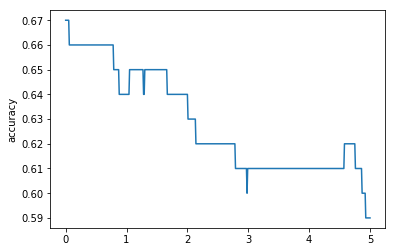

In [60]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0, 5.01, 0.01),accuracy)
plt.ylabel('accuracy')
plt.show()

Problem 12
---

$\lambda_{max}$ = 0.035

Problem 13
---

In [61]:
R = irl(100, env.PU, env.PD, env.PL, env.PR , 0.035, 0.8, 1, P1)
estimate_reward = np.asarray(R).reshape(10,10)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -4.0000e+02  2e+03  2e+00  2e+01  1e+00
 1: -6.7367e+02 -1.2652e+03  1e+04  3e+00  3e+01  5e+00
 2: -2.2644e+03 -2.8283e+03  2e+04  3e+00  3e+01  1e+01
 3: -1.7964e+04 -1.8331e+04  1e+05  2e+00  2e+01  7e+01
 4: -1.6833e+06 -1.6781e+06  1e+07  3e+00  2e+01  6e+03
 5: -1.6841e+08 -1.6785e+08  1e+09  3e+00  2e+01  6e+05
Certificate of dual infeasibility found.


In [62]:
def heap_map(reward):
    x = np.arange(11)
    y = np.arange(11)
    X, Y = np.meshgrid(x, y)
    plt.pcolor(X, Y, reward, edgecolors='k', linewidths=0.5 )
    plt.colorbar()
    plt.gca().invert_yaxis()

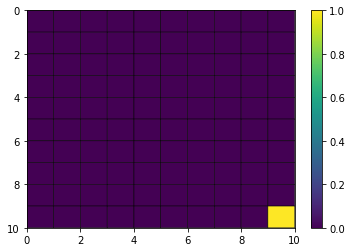

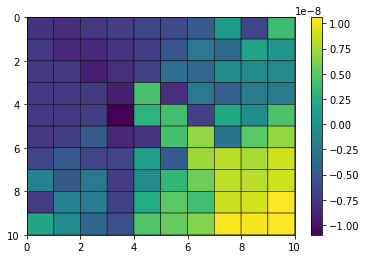

In [63]:
reward_1 = np.zeros((10,10))
reward_1[-1,-1] = 1
plt.figure()
heap_map(reward_1)
plt.figure()
heap_map(estimate_reward)

Problem 14
---

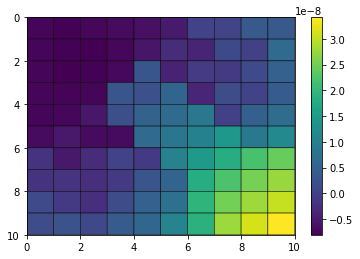

In [70]:
plt.figure()
heap_map(value_iteration(Environment(w=0.1,disc=0.8),R))

Problem 16
---

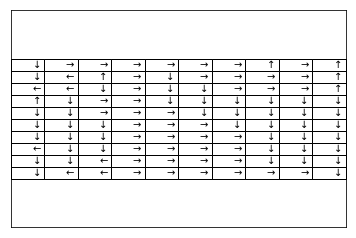

In [80]:
#action 0 is 'up'; action 1 is 'down'; action 2 is 'left'; action 3 is 'right'
arrow_dict = {0:'↑', 1:'↓', 2:'←', 3:'→'}
arrow = optimal_policy(Environment(w=0.1,disc=0.8),R)
arrow = np.asarray(arrow)
arrow_visual = [['↑' for x in range(10)] for y in range(10)]

for i in range(arrow.shape[0]):
    for j in range(arrow.shape[1]):
        arrow_visual[i][j] = arrow_dict[arrow[i][j]]

plt.figure()
tb = plt.table(cellText=arrow_visual, loc=(0,0))
tc = tb.properties()['child_artists']
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
plt.show()